In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
import time


import seaborn as sns
sns.set_style("whitegrid")

from scipy.spatial.distance import jensenshannon

import urllib3
import json

# For the Python notebook
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# Get data from nomis

In [2]:
df = pd.read_csv('../../data/testing/nomis/fam_comp.csv', index_col=0)

In [3]:
boroughs = ['City of London', 'Westminster', 'Kingston upon Thames', 'Bromley', 'Greenwich', 'Havering', 'Barnet', 'Enfield', 'Hillingdon', 'Brent']

In [4]:
dct = {}

for b in boroughs:
    dct[b] = df[b].values

In [5]:
df = pd.DataFrame(dct, index=df.index)

In [6]:
df.to_csv('../../data/testing_select/nomis/fam_comp.csv')

# Compute values for synthetic data

In [7]:
boroughs = ['City of London', 'Westminster', 'Kingston upon Thames', 'Bromley', 'Greenwich', 'Havering', 'Barnet', 'Enfield', 'Hillingdon', 'Brent']
idx = ['Total', 'Single', 'Couple family', 'Lone parent', 'Other']

In [8]:
# ciDATGAN
dct = {}

for b in boroughs:
    df = pd.read_csv('../../data/ciDATGAN_select/{}.csv'.format(b))

    vals = [0]

    for c in idx[1:]:
        vals.append(np.sum(1/df[df['hh_comp'] == c]['hh_people']))

    vals[0] = np.sum(vals[1:])

    dct[b] = vals

In [9]:
df = pd.DataFrame(dct, index=idx)
df.to_csv('../../data/testing_select/ciDATGAN/fam_comp.csv')

In [10]:
# DATGAN
dct = {}

for b in boroughs:
    df = pd.read_csv('../../data/DATGAN_select/{}.csv'.format(b))

    vals = [0]

    for c in idx[1:]:
        vals.append(np.sum(1/df[df['hh_comp'] == c]['hh_people']))

    vals[0] = np.sum(vals[1:])

    dct[b] = vals

In [11]:
df = pd.DataFrame(dct, index=idx)
df.to_csv('../../data/testing_select/DATGAN/fam_comp.csv')

In [12]:
# oversample
dct = {}

for b in boroughs:
    df = pd.read_csv('../../data/oversample/{}.csv'.format(b))

    vals = [0]

    for c in idx[1:]:
        vals.append(np.sum(1/df[df['hh_comp'] == c]['hh_people']))

    vals[0] = np.sum(vals[1:])

    dct[b] = vals

In [13]:
df = pd.DataFrame(dct, index=idx)
df.to_csv('../../data/testing_select/oversample/fam_comp.csv')

# Compare

In [25]:
orig = pd.read_csv('../../data/testing_select/nomis/fam_comp.csv', index_col=0)

In [26]:
files = [
    '../../data/testing_select/DATGAN/fam_comp.csv',
    '../../data/testing_select/ciDATGAN/fam_comp.csv',
    '../../data/testing_select/oversample/fam_comp.csv'
]

dfs = [pd.read_csv(f, index_col=0) for f in files]
labels = ['DATGAN', 'ciDATGAN', 'Oversample LTDS']

In [27]:
orig = orig/orig.iloc[0]
orig = orig.iloc[1:-1]

errors = {}

for (df, l) in zip(dfs, labels):
    df = df/df.iloc[0]
    df = df.iloc[1:-1]

    errors[l] = []

    for c in orig.columns:
        errors[l].append(jensenshannon(df[c], orig[c]))

In [28]:
for l in labels:
    print('{}: {:.2e} \pm {:.2e}'.format(l, np.mean(errors[l]), np.std(errors[l])))

DATGAN: 6.89e-02 \pm 3.17e-02
ciDATGAN: 8.54e-02 \pm 4.90e-02
Oversample LTDS: 5.94e-02 \pm 3.12e-02


<AxesSubplot:>

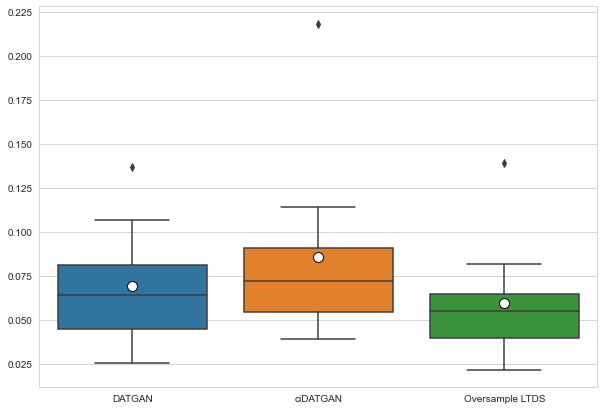

In [29]:
df = pd.DataFrame(errors)

plt.figure(figsize=(10,7))

sns.boxplot(data=df,showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                      "markersize":"10"})

In [30]:
df

,DATGAN,ciDATGAN,Oversample LTDS
0,0.136999,0.218214,0.138796
1,0.106765,0.092721,0.081607
2,0.047283,0.039182,0.021698
3,0.065332,0.072522,0.057834
4,0.075080,0.057064,0.060001
5,0.044187,0.084194,0.052205
6,0.025437,0.053551,0.046406
7,0.042186,0.050844,0.032505
8,0.063114,0.071494,0.036988
9,0.082752,0.114290,0.066319
